In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
#pd.options.display.max_rows = 100

# Exercise 3

**Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona**

- For the arriving airport, you can use the Destination column in the searches file. 
- Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.
- **Bonus point**: Solving this problem using pandas (instead of any other approach)

### Finished Exercise

|City|IATA Code|
|:----:|:----:|
|Madrid|MAD|
|Málaga|AGP|
|Barcelona|BCN|

##### Option 1

First we need to adapt our function from the last exercise to the current exercise. Let's take a look at the changes.
- Now we don't need to filter by the year. 
- Delete possible blank spaces and drop the day from `Date` column.
- Delete possible blank spaces and make sure all cells from `Destination` column are capitalized.
- Drop `NaN` values.
- Finally we add an alert message that shows us if there is any cell with length other than 3 in the `Destination` column. Also it deletes the row if it is wrong.

In [2]:
def data_preprocessing(df): 
    '''

    '''

    df['Date'] = df['Date'].str.strip().str[:7]
    
    df['Destination'] = df['Destination'].str.strip().str.upper()
    df.dropna(inplace=True)
    #data_chunk.reset_index(inplace=True)
    
    destination_length = (df['Destination'].map(len) != 3).sum()
    if destination_length != 0:
        print('Alert! Thsearchesere are `Destination` values with length different than 3. Deleting it..')
        wrong_data = df[(df['Destination'].map(len) != 3)]
        print(wrong_data)
        df.drop(df[(df['Destination'].map(len) != 3)].index, inplace=True)
        
    return df

Next, we read the dataset in chunks. We process each chunk passing it as an argument in our function. Then we append the data to searches. 

In [5]:
data_iterator = pd.read_csv("../challenge/searches.csv.bz2", 
                            chunksize=10**6, 
                            sep='^', 
                            usecols=['Date', 'Destination'],
                            compression='bz2',
                            #nrows=10**5
                           )


searches = pd.DataFrame()
for i, data_chunk in enumerate(data_iterator):
    #print("Chunk: %d, size of chunk %d"%(i+1, len(data_chunk)))
    data_chunk = data_preprocessing(data_chunk)
    #data_chunk.reset_index(inplace=True)
    searches = searches.append(data_chunk)

Alert! Thsearchesere are `Destination` values with length different than 3. Deleting it..
             Date Destination
20390197  2013-10          HA


In [6]:
searches[(searches['Destination'].map(len) != 3)]

,Date,Destination


Finally we plot a line for each airport by filtering the dataframe by the IATA code, and then we group the filtered data by `Date` and calculate its length.

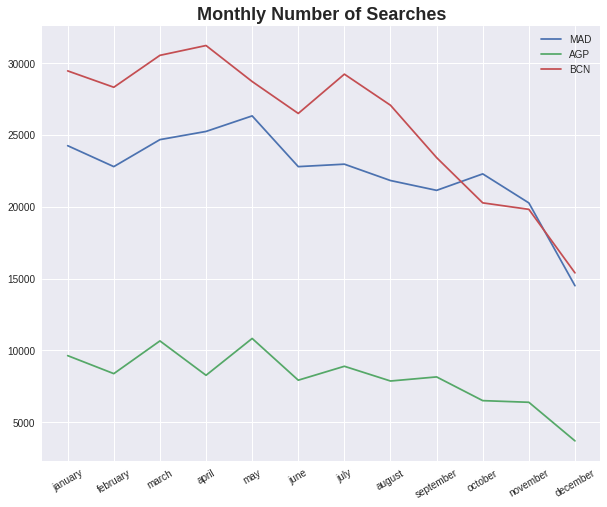

In [7]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10,8))

iata_codes = ['MAD', 'AGP', 'BCN']
for code in iata_codes:
    searches[searches['Destination'] == code].groupby('Date').agg([len]).plot(ax=ax)

ax.set_title('Monthly Number of Searches', 
             fontsize=18, 
             fontweight ='bold')

ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
months = ['january', 'february', 'march', 
          'april', 'may', 'june',
          'july', 'august', 'september', 
          'october', 'november', 'december']
ax.set_xticklabels(months, rotation=30)
ax.set_xlabel('')

leg = ax.legend(['MAD', 'AGP', 'BCN']);
ax.figure.savefig('exercise_3.png');

* ***No entiendo por qué cuando hago el `reset_index` me cambia el color de las lineas pero no el de la `legend`. -> Preguntar***

##### Option 2  (faster)

In [8]:
data_iterator = pd.read_csv("../challenge/searches.csv.bz2", 
                            chunksize=10**6, 
                            sep='^', 
                            usecols=['Date', 'Destination'],
                            compression='bz2',
                            #nrows=10**5
                           )

madrid_searches = pd.DataFrame()
barcelona_searches = pd.DataFrame()
malaga_searches = pd.DataFrame()

for i, data_chunk in enumerate(data_iterator):
    #print("Chunk: %d, size of chunk %d"%(i+1, len(data_chunk)))
    
    data_chunk = data_preprocessing(data_chunk)
    #data_chunk.reset_index(inplace=True)
    
    madrid_data_chunk = data_chunk[data_chunk['Destination'] == 'MAD']
    madrid_searches = madrid_searches.append(madrid_data_chunk)

    barcelona_data_chunk = data_chunk[data_chunk['Destination'] == 'BCN']
    barcelona_searches = barcelona_searches.append(barcelona_data_chunk)
    
    malaga_data_chunk = data_chunk[data_chunk['Destination'] == 'AGP']
    malaga_searches = malaga_searches.append(malaga_data_chunk)

Alert! Thsearchesere are `Destination` values with length different than 3. Deleting it..
             Date Destination
20390197  2013-10          HA


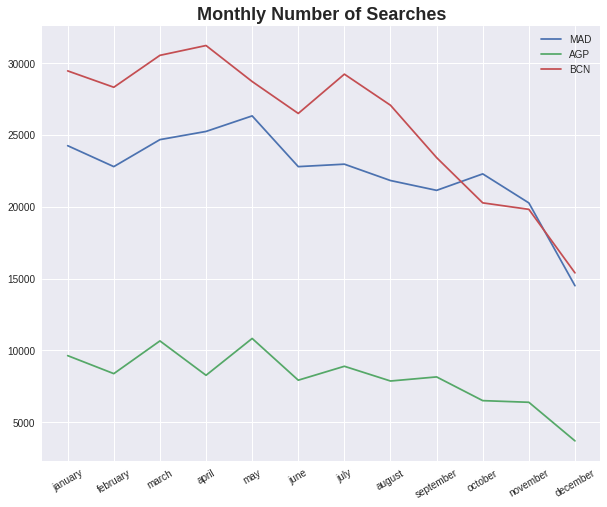

In [9]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10,8))

madrid_searches.groupby('Date').agg([len]).plot(ax=ax)
malaga_searches.groupby('Date').agg([len]).plot(ax=ax)
barcelona_searches.groupby('Date').agg([len]).plot(ax=ax)

ax.set_title('Monthly Number of Searches', 
             fontsize=18, 
             fontweight ='bold')

ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
months = ['january', 'february', 'march', 
          'april', 'may', 'june',
          'july', 'august', 'september', 
          'october', 'november', 'december']
ax.set_xticklabels(months, rotation=30)
ax.set_xlabel('')

leg = ax.legend(['MAD', 'AGP', 'BCN']);

------------------------

### First Approximation 

We satart by reading a few columns to check the columns and their formats.

In [10]:
searches = pd.read_csv('../challenge/searches.csv.bz2', nrows=10, sep='^', 
                       compression='bz2', parse_dates=['Date'])
searches.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,ARN,2013-01-02,DU,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [11]:
searches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               10 non-null     datetime64[ns]
 1   Time               10 non-null     object        
 2   TxnCode            10 non-null     object        
 3   OfficeID           10 non-null     object        
 4   Country            10 non-null     object        
 5   Origin             10 non-null     object        
 6   Destination        10 non-null     object        
 7   RoundTrip          10 non-null     int64         
 8   NbSegments         10 non-null     int64         
 9   Seg1Departure      10 non-null     object        
 10  Seg1Arrival        10 non-null     object        
 11  Seg1Date           10 non-null     object        
 12  Seg1Carrier        2 non-null      object        
 13  Seg1BookingCode    1 non-null      object        
 14  Seg2Departure

Next, we load only the columns we will use.

In [17]:
chunks = pd.read_csv('../challenge/searches.csv.bz2', chunksize=10**6,  
                     sep='^', compression='bz2', 
                     usecols=['Date', 'Destination'],
                     #nrows=10**6
                    )

searches = pd.concat(chunks)

In [18]:
searches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20390198 entries, 0 to 20390197
Data columns (total 2 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Date         object
 1   Destination  object
dtypes: object(2)
memory usage: 311.1+ MB


In [19]:
searches.head()

,Date,Destination
0,2013-01-01,AUH
1,2013-01-01,MIL
2,2013-01-01,SFO
3,2013-01-01,ARN
4,2013-01-01,MAD


We look for missing values. If we had converted the `Date` column to `datetype` we would have missing values there. We will drop it but maybe it could be fixed.

In [20]:
searches['Date'].isna().sum()

0

In [21]:
searches['Destination'].isna().sum()

33

In [22]:
searches[searches['Destination'].isna()]

,Date,Destination
1436001,"2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5c...",NaN
1795011,"2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5c...",NaN
1795021,"2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5c...",NaN
3231031,"2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5c...",NaN
3590041,"2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5c...",NaN
3590051,"2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5c...",NaN
5026061,"2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5c...",NaN
5385071,"2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5c...",NaN
5385081,"2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5c...",NaN
6821091,"2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5c...",NaN


In [27]:
searches.loc[searches['Destination'].isna(), 'Date'].head(2)

1436001    2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5c...
1795011    2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5c...
Name: Date, dtype: object

In [29]:
searches.dropna(inplace=True, subset=['Destination'])

In [31]:
searches['Destination'].isna().sum()

0

In [32]:
searches['Destination'] = searches['Destination'].str.strip()

In [ ]:
searches['Date'].dt.year.value_counts()

|City|IATA Code|
|:----:|:----:|
|Madrid|MAD|
|Málaga|AGP|
|Barcelona|BCN|

In [ ]:
madrid_searches = searches[searches['Destination'] == 'MAD']
madrid_searches.head()

In [ ]:
malaga_searches = searches[searches['Destination'] == 'AGP']
malaga_searches.head()

In [ ]:
barcelona_searches = searches[searches['Destination'] == 'BCN']
barcelona_searches.head()

In [ ]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10,8))

madrid_searches['Date'].dt.month.value_counts().sort_index().plot(label='MAD')
malaga_searches['Date'].dt.month.value_counts().sort_index().plot(label='AGP')
barcelona_searches['Date'].dt.month.value_counts().sort_index().plot(label='BCN')

ax.set_title('Monthly Number of Searches', 
             fontsize=18, 
             fontweight ='bold')

ax.set_xticks([2, 4, 6, 8, 10, 12])
months = ['february', 'april', 'june', 
          'august', 'october', 'december']
ax.set_xticklabels(months)

ax.legend();